In [7]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

## Interacting Holographic Dark Energy Model (IHDE)
### For the holographic dark energy model with the dark matter interaction, the evolution of the 
### the density parameter is given by 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{Q \Omega_{de}}{(1+z)H\rho_c} - \frac{3 \Omega_{de} \Omega_{eff} \omega_{eff}}{z+1} \,
$$
### for an universe dominated by dark matter and dark energy, the Friedmann constraint is just $\Omega_{de} + \Omega_{d}=1$ 
### and $\Omega_{eff}=0$. Also, if we consider the interaction in the form $Q = 3 b^2 H \rho_c$. The last equation takes the form 
$$
\frac{d \Omega_{de}}{da} = \frac{\Omega_{de}(1-\Omega_{de}) }{a} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right)- \frac{3 b^2 \Omega_{de}}{a} \,
$$
### for the simple holographic dark energy model (without interaction) is just the case $b = 0$.
$$
\frac{d \Omega_{de}}{da} = \frac{\Omega_{de}(1-\Omega_{de}) }{a} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right)
$$

In [43]:
#Right hand side of the equations
def RHS_a_hde(Omega, a, c=0.8, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega

def fun_root(Omega_0 , c=0.8, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+3), 1, 500)
    result_a_hde = odeint(RHS_a_hde, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde[-1] - Ode0

s = optimize.newton(fun_root, 1)

The initial value at z=3 is  0.08395681981319769


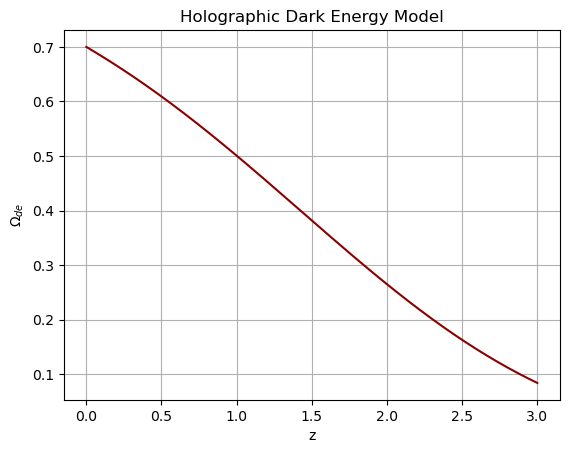

In [50]:
z = np.linspace(3,0,500)

sol_ini =odeint(RHS_a_hde, s*10**(-5), np.linspace(1./(1+3), 1, 500), args=(0.8,0))
plt.plot(z, sol_ini,color='darkred',)
plt.grid()
plt.xlabel('z')
plt.ylabel('$\Omega_{de}$')
plt.title('Holographic Dark Energy Model')
print('The initial value at z=3 is ', float(sol_ini[0]))

The initial value at z=3 is  0.13358269741230291


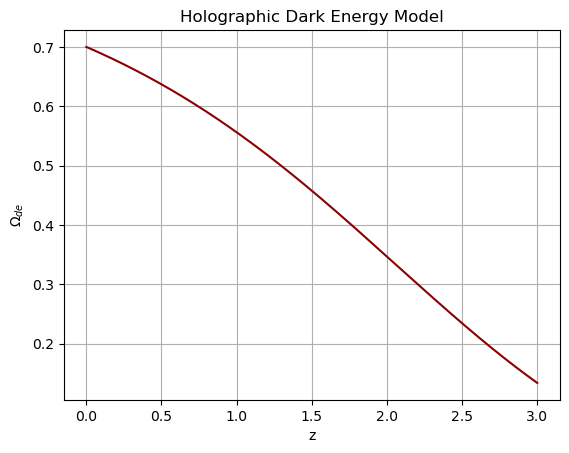

In [64]:
'''
Holographic Dark Energy Model with interactions 
'''

#Right hand side of the equations
def RHS_a_hdei(Omega, a, ci=0.8, b2i=0.1):
    dOmegaI = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/ci)/a - (3*Omega*b2i)*(1/a)
    return dOmegaI

def fun_rooti(Omega_0, ci=0.8, Ode0=0.7, b2i=0.1):
    a_hde = np.linspace(1./(1+3), 1, 500)
    result_a_hdei = odeint(RHS_a_hdei, Omega_0*10**(-5), a_hde, args=(ci,b2i))
    return result_a_hdei[-1] - Ode0

si = optimize.newton(fun_rooti, 1)

z = np.linspace(3,0,500)

sol_hdei =odeint(RHS_a_hdei, si*10**(-5), np.linspace(1./(1+3), 1, 500), args=(0.8,0.1))

plt.plot(z, sol_hdei,color='darkred',)
plt.grid()
plt.xlabel('z')
plt.ylabel('$\Omega_{de}$')
plt.title('Holographic Dark Energy Model')
print('The initial value at z=3 is ', float(sol_hdei[0]))

In [45]:
1./(1+3)

0.25

In [ ]:
''' 
Shooting method to find initial values 

'''



